# 🔍 Feature Selection & Dimensionality Reduction
This notebook loads the processed NSL-KDD dataset and applies:
- Mutual Information for feature selection
- PCA for dimensionality reduction
- Visualization of variance explained

In [3]:
# 📦 Imports
import numpy as np
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Paths
DATA_DIR = 'data/processed/'
X_train = np.load(DATA_DIR + 'X_train.npy')
y_train = np.load(DATA_DIR + 'y_train.npy')
X_test = np.load(DATA_DIR + 'X_test.npy')
y_test = np.load(DATA_DIR + 'y_test.npy')

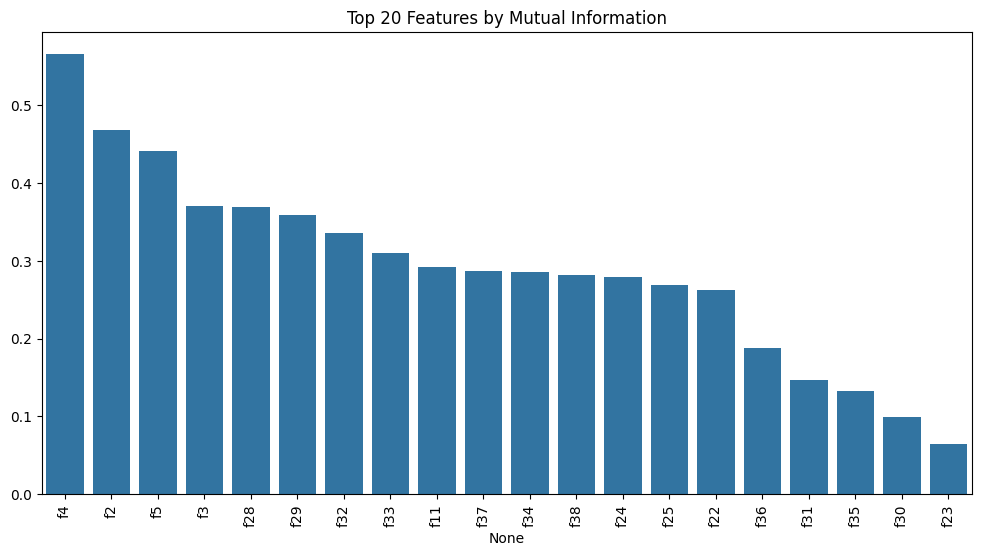

In [4]:
# ✅ Mutual Information Feature Selection
mi_scores = mutual_info_classif(X_train, y_train)
mi_scores = pd.Series(mi_scores)
mi_scores.index = [f'f{i}' for i in range(X_train.shape[1])]
mi_scores = mi_scores.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=mi_scores.index[:20], y=mi_scores.values[:20])
plt.title('Top 20 Features by Mutual Information')
plt.xticks(rotation=90)
plt.show()

In [5]:
# 📉 PCA for Dimensionality Reduction
pca = PCA(n_components=0.95)  # Preserve 95% variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f'Original shape: {X_train.shape}, Reduced shape: {X_train_pca.shape}')

Original shape: (125973, 41), Reduced shape: (125973, 10)


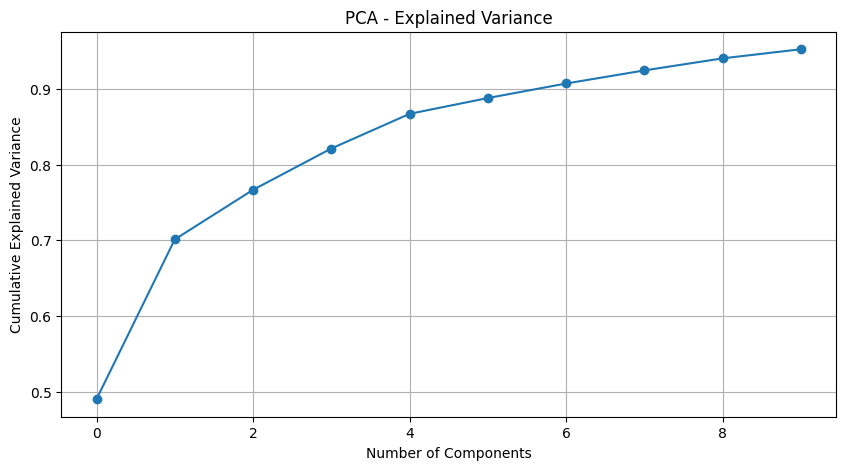

In [6]:
# 📊 Visualize Explained Variance
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance')
plt.grid(True)
plt.show()

In [7]:
# 💾 Save PCA-reduced data
np.save(DATA_DIR + 'X_train_pca.npy', X_train_pca)
np.save(DATA_DIR + 'X_test_pca.npy', X_test_pca)
print('✅ Saved PCA-reduced features.')

✅ Saved PCA-reduced features.
